[View in Colaboratory](https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/3_1_Anna's_Music_Box.ipynb)

# 3.1 Anna's Music Box
*Rule-based* systems can be cumbersome to write and reason through, often involving complex, branching logical control flow  *if/then* structures and large sets of rules. In a **parametric** model, by comparison, musical features — such as rhythm, melody, harmony, or even "interestingness" — are expressed with numerival values, often between 0 and 1, called *parameters*. In this notebook, we'll reverse engineer Larry Polansky's *Anna's Music Box* and code a few musical parameters to represent features of melody and rhythm. 


## Setup

In [0]:
# install external libraries
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!pip install -q pretty_midi
!pip install -q pyfluidsynth
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1

In [2]:
# imports
import mai
import pretty_midi
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Rhythm
How would you express rhythm as a value between `0.0` and `1.0`? In AMB, two parameters `pulse` and `rhythm` determine the timing of notes. Can you reverse engineer how they work?



In AMB, `pulse` determines the basic note duration (in bpm, which means "beats per minute", so larger numbers are faster) and `rhythm` controls the amount of variation around the pulse.  A `rhythm` value of `1` produces unveven rhythms and `0` produces a steady pulse.

**Exercise 1:** Given values for `pulse` and `rhythm`, write an expression to calculate the duration of a note. Hint: convert from bpm to duration in seconds by writing `60.0 / pulse`. We'll also need a new random number generator, `random.uniform(-1,1)`, which chooses a random floating point number between `-1.0` and `1.0`.

In [3]:
# parameters
pulse = 240
rhythm = 1

# choose duration
duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)
print duration

0.249512608512


Let's try it. Generate a list of 12 notes using a `while` loop structure.

In [0]:
# start with an empty list
my_durs = []

# loop until we have enough notes
while len(my_durs) < 12:

  # choose duration
  new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

  # append to the melody
  my_durs += [new_duration]

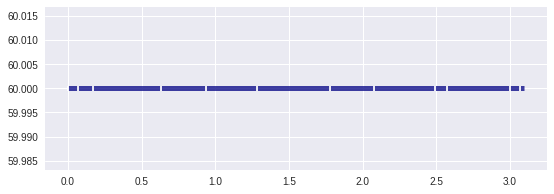

In [5]:
# let's see it
mai.make_music_plot(pitches=60, durs=my_durs)
# let's hear it
mai.make_music(pitches=60, durs=my_durs, is_drum=True)

## Pitch
How would you express pitch as a parameter? In AMB, the two parameters `pitch` and `range` determine the range of available pitches, expressed in terms of a pitch center pitch and range above and below that center pitch.

**Exercise 2:** Given values for `pitch_center` and `pitch_range`, write an expression to choose a random pitch. Hint: remember, the two values inside the parenthesis determined the mininum and maximum value of `random.randint(0,127)`.

In [6]:
# parameters
pitch_center = 60
pitch_range = 6 

# choose pitch
pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)
print pitch

54


Let's try it. Generate a list of 12 notes using a `while` loop structure. We're now adding to the previous `while` loop, choosing pitch as well as duration.

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # choose pitch
  new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)
  
  # choose duration
  new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_duration]

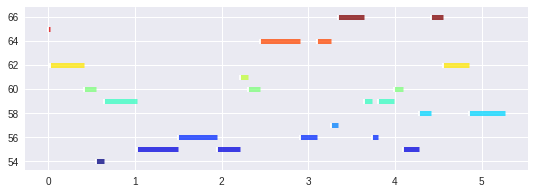

In [8]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)
# let's hear it
mai.make_music(pitches=my_pitches, durs=my_durs, is_drum=False)

## (De)tuning
I thought it'd be fun to add a parameter called `detune` to control microtonal pitch inflections, since we're now setup for microtonal sound playback.

**Exercise 3:** Given a value for `detune` , write an expression to adjust the chosen pitch up to plus/minus one semitone (`+/-1.0`).

In [9]:
# parameter
detune = 0.5 

# microtronal pitch adjustment
microtones = random.uniform(-1, 1) * detune
pitch += microtones
print pitch

53.7428539389


And add it to the `while` loop.

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # choose pitch
  new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)
  
  # choose microtones and adjust pitch 
  microtones = random.uniform(-1, 1) * detune
  new_pitch += microtones
  
  # choose duration
  new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_duration]

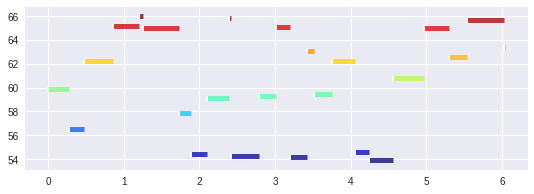

In [11]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)
# let's hear it
mai.make_music(pitches=my_pitches, durs=my_durs, is_drum=False)

## Repeat
AMB has a parameter called `repeat` which controls the "interesting-ness" of the melody. I think this is pretty cool, because we're no longer quantifying lower level musical features like which notes and which durations, but thinking about higher level music concepts, like what even makes something interesting? In this case, "interestingness" has to do with how much the melody repeats itself.

Specifically, `repeat` controls the likelihood that the critter looks back and repeats a recent note. There's more than one way to do this. For instance, if the critter looks back 5 notes, the critter might choose from all of the past `5` notes, or the critter might just take the fifth previous note. Believe it or not, these implementations produce very different musical results. They're both coded below, so give them a shot.

**Exercise 4:** Given a value for `repeat`, write an expression to implement the likelihood that the melody repeats itself. 


In [12]:
# parameter
repeat = 0.75

# let's say this is our music thus far
my_music = [60, 62, 64, 64, 64, 66, 64, 60]

# do we look back or choose a brand new pitch?
if random.random() < repeat:
  # take the fifth previous note
  pitch = my_music[-5]
  # choose from the past five notes
  # pitch = random.choice(my_music[-5:])

print pitch

64


Add it to the `while` loop.

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # do we look back?
  if random.random() < repeat and len(my_pitches) > 5:

    # choose pitch and duration from past
    # take the fifth previous note
    new_pitch = my_pitches[-5]
    new_duration = my_durs[-5]
    # alternatively choose FROM the past five notes
    # new_pitch = random.choice(my_pitches[-5:])
    # new_duration = random.choice(my_durs[-5:])
 
  # if we don't look back
  else:
    
    # choose pitch
    new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)

    # choose microtones and adjust pitch 
    micro = random.uniform(-1, 1) * detune
    new_pitch += micro

    # choose duration
    new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_duration]

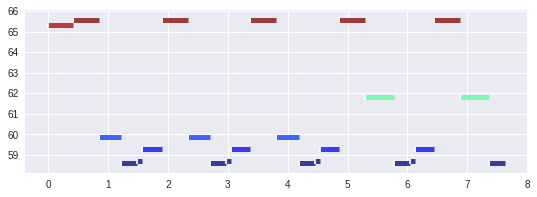

In [14]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)
# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=1)

## All in one place
Let's put it all together in one place. The neat thing about parametric models is that all of the different combinations of parameter values describe different musical systems. Try adjusting a few parameters and see what comes out.

In [0]:
# parameters
pitch_center = 60 # pitch in MIDI pitch value 
pitch_range = 6   # variation in MIDI pitch value
pulse = 120       # in bpm beats per minute
rhythm = 1        # percent of variation around the pulse
detune = 0.5      # amount of microtonal inflection
repeat = 0.75     # probability of repeat

In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # do we look back?
  if random.random() < repeat and len(my_pitches) > 5:

    # choose pitch and duration from past
    # take the fifth previous note
    new_pitch = my_pitches[-5]
    new_duration = my_durs[-5]
    # choose FROM the past five notes
    # new_pitch = random.choice(my_pitches[-5:])
    # new_duration = random.choice(my_durs[-5:])
 
  # if we don't look back
  else:
    
    # choose pitch
    new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)

    # choose microtones and adjust pitch 
    micro = random.uniform(-1, 1) * detune
    new_pitch += micro

    # choose duration
    new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_duration]

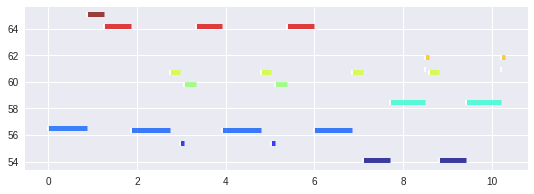

In [17]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)
# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=1, is_drum=False)

## Better yet
How many jellie beans are in the jar? A whole lot... Let's choose some random parameter settings and see what we thing.

In [18]:
# parameters
pitch_center = random.randint(33, 99) # pitch in MIDI pitch value 
pitch_range = random.randint(1, 36)   # variation in MIDI pitch value
pulse = random.randint(40, 480)       # in bpm beats per minute
rhythm = random.uniform(0, 1)         # percent of variation around the pulse
detune = random.uniform(0, 1)         # amount of microtonal inflection
repeat = random.uniform(0, 1)         # probability of repeat

print pitch_center
print pitch_range
print pulse
print rhythm
print detune
print repeat

83
33
255
0.788818070687
0.748607860971
0.640947366928


In [0]:
# start with empty lists for both pitch and duration
my_pitches = []
my_durs = []

# loop until we have enough notes
while len(my_durs) < 24:

  # do we look back?
  if random.random() < repeat and len(my_pitches) > 5:

    # choose pitch and duration from past
    # take the fifth previous note
    new_pitch = my_pitches[-5]
    new_duration = my_durs[-5]
    # choose FROM the past five notes
    # new_pitch = random.choice(my_pitches[-5:])
    # new_duration = random.choice(my_durs[-5:])
 
  # if we don't look back
  else:
    
    # choose pitch
    new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)

    # choose microtones and adjust pitch 
    micro = random.uniform(-1, 1) * detune
    new_pitch += micro

    # choose duration
    new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

  # append to the melody
  my_pitches += [new_pitch]
  my_durs += [new_duration]

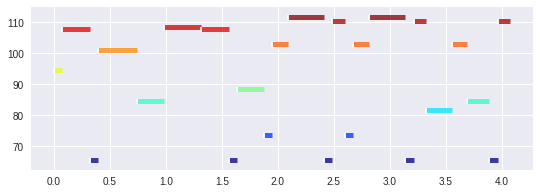

In [20]:
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)
# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=1, is_drum=False)

## Functions
At this point I'm pretty tired of copy and pasting that giant `while` loop, so what can we do about it? The answer: **functions**. Functions allow us to reuse code. We'll put the code that we want to reuse -- e.g., that huge `while` loop -- inside a function defintion. Then, when we call the function name, Python will exectue the code inside. This allows us to reuse the same code without having to rewrite it every time. 

The cell below defined a function, called `amb`. Whenever we want to execute the `while` loop code, we'll just write amb() instead. Functions are central concept in programming and we'll learn more about them in the next Tutorial.

In [0]:
# define Anna's Music Box as a function
def amb(pitch_center=40, pitch_range=6, pulse=120, rhythm=0.0, detune=0.0, repeat=0.5):
  
  # start with empty lists for both pitch and duration
  my_pitches = []
  my_durs = []

  # loop until we have enough notes
  while len(my_durs) < 24:

    # do we look back?
    if random.random() < repeat and len(my_pitches) > 5:

      # choose pitch and duration from past
      # take the fifth previous note
      new_pitch = my_pitches[-5]
      new_duration = my_durs[-5]
      # choose FROM the past five notes
      # new_pitch = random.choice(my_pitches[-5:])
      # new_duration = random.choice(my_durs[-5:])

    # if we don't look back
    else:

      # choose pitch
      new_pitch = random.randint(pitch_center - pitch_range, pitch_center + pitch_range)

      # choose microtones and adjust pitch 
      micro = random.uniform(-1, 1) * detune
      new_pitch += micro

      # choose duration
      new_duration = (60.0 / pulse) + random.uniform(-1,1) * rhythm * (60.0 / pulse)

    # append to the melody
    my_pitches += [new_pitch]
    my_durs += [new_duration]
    
  return my_pitches, my_durs

And now we can run AMB in many fewer lines of code!

57
31
190
0.465312955655
0.996722895201
0.404977876173


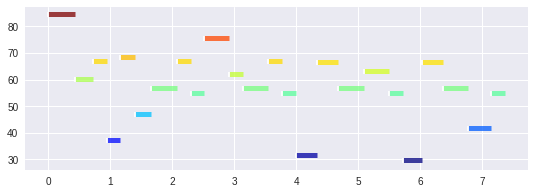

In [22]:
# parameters
pitch_center = random.randint(33, 99) # pitch in MIDI pitch value 
pitch_range = random.randint(1, 36)   # variation in MIDI pitch value
pulse = random.randint(40, 480)       # in bpm beats per minute
rhythm = random.uniform(0, 1)         # percent of variation around the pulse
detune = random.uniform(0, 1)         # amount of microtonal inflection
repeat = random.uniform(0, 1)         # probability of repeat

# print them
print pitch_center
print pitch_range
print pulse
print rhythm
print detune
print repeat

# run AMB
my_pitches, my_durs = amb(pitch_center=pitch_center, pitch_range=pitch_range, pulse=pulse, rhythm=rhythm, detune=detune, repeat=repeat)
# let's see it
mai.make_music_plot(pitches=my_pitches, durs=my_durs)
# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=1, is_drum=False)